In [1]:
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

# Instance Independent

In [2]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='iin', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=20, transform=transform)

noise count: 12000 out of 60000 data


In [3]:
noise_cleaner.clean()

Training fold 1/5...


Epoch 0/20:   0%|          | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [18]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400, num_epochs=50)

In [ ]:
predictor.train(10)

In [24]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:10<00:00,  2.49it/s]

Test Accuracy: 92.33%


0.9233

# Instance Dependent

## FMnist

In [2]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=60, transform=transform, train_pairs=6000, val_pairs=1000)

Seed: 19
noise count: 12280 out of 60000 data


Training fold 1/5...


Extracting Embeddings: 100%|██████████| 125/125 [00:02<00:00, 62.34it/s]


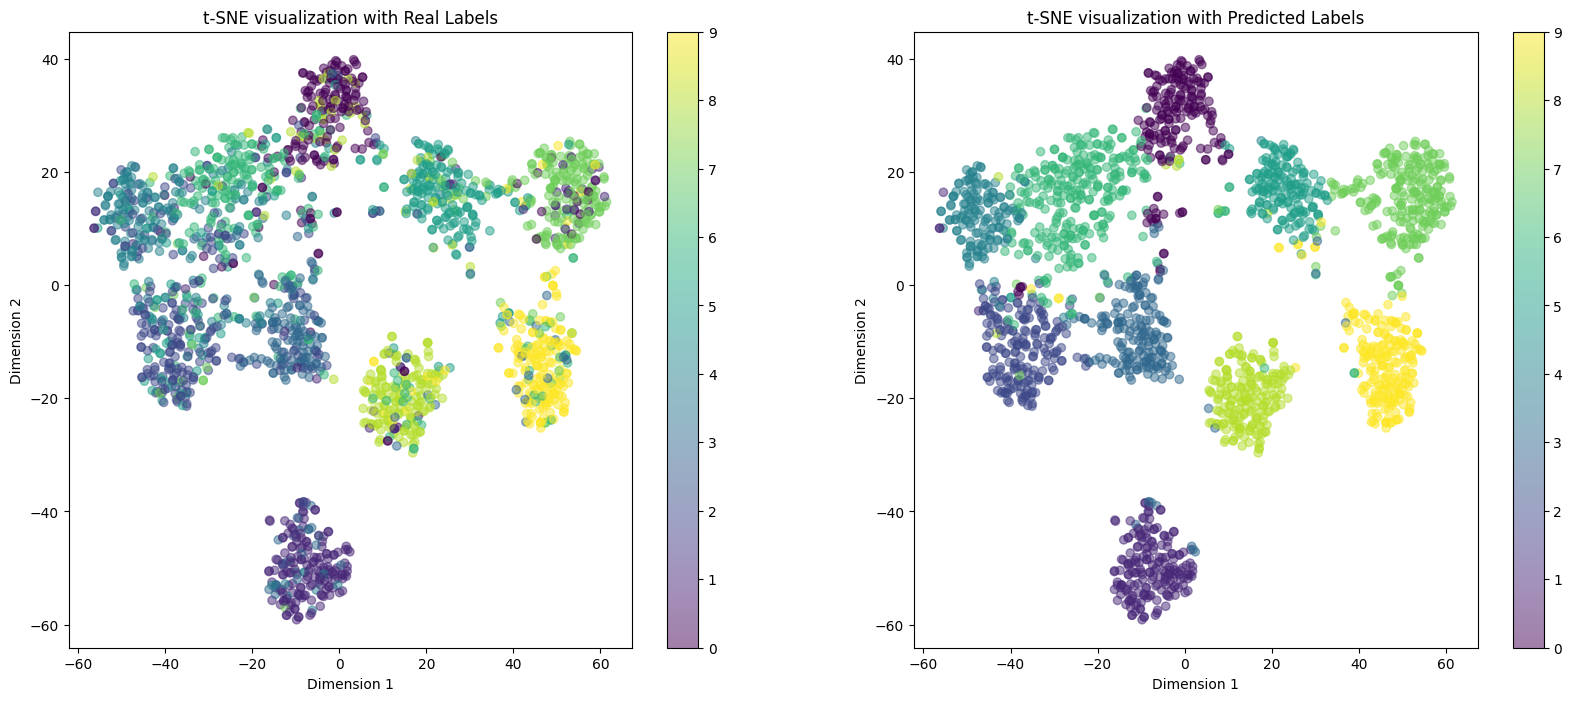

value counts for predicted:
[[  0 188]
 [  1 190]
 [  2 188]
 [  3 191]
 [  4 150]
 [  5 164]
 [  6 296]
 [  7 236]
 [  8 195]
 [  9 202]]
value counts for real:
[[  0 171]
 [  1 200]
 [  2 247]
 [  3 182]
 [  4 188]
 [  5 227]
 [  6 218]
 [  7 204]
 [  8 189]
 [  9 174]]


Testing: 100%|██████████| 125/125 [00:01<00:00, 68.44it/s]


Test Accuracy: 67.05%
Test Precision: 0.68
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 78.41it/s]


Test Accuracy: 66.55%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_2.pth
Finished training fold 2
Training fold 3/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 74.43it/s]


Test Accuracy: 68.15%
Test Precision: 0.68
Test Recall: 0.68
Test F1 Score: 0.68
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_3.pth
Finished training fold 3
Training fold 4/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 72.74it/s]


Test Accuracy: 68.65%
Test Precision: 0.69
Test Recall: 0.69
Test F1 Score: 0.69
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_4.pth
Finished training fold 4
Training fold 5/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 71.36it/s]


Test Accuracy: 67.40%
Test Precision: 0.68
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_5.pth
Finished training fold 5


Evaluating Noisy Samples for fold 5: 100%|██████████| 25/25 [00:50<00:00,  2.00s/it]


Predicted noise indices: [39510, 20894, 57751, 13016, 550, 15939, 59298, 23501, 57556, 23221, 26125, 25840, 52571, 58416, 25474, 9787, 25419, 33103, 7488, 57071, 14259, 46788, 54569, 30206, 41104, 27240, 5947, 31333, 17371, 11359, 11369, 26626, 36483, 34300, 1590, 11749, 36501, 19589, 58436, 13186, 45047, 23406, 40405, 40684, 6155, 25997, 3190, 21655, 52961, 38681, 40342, 1186, 25663, 37313, 1485, 20299, 1407, 26964, 59872, 29436, 39998, 28044, 16556, 19724, 7805, 31176, 37728, 41559, 57558, 16726, 10621, 38894, 1556, 13996, 54328, 4988, 11185, 14642, 20133, 54773, 54069, 42638, 55691, 55456, 15880, 57790, 27265, 21401, 23749, 20092, 55438, 21272, 9250, 41248, 48966, 16784, 35153, 44804, 1027, 27170, 1395, 37527, 501, 55836, 15593, 14012, 51862, 2447, 11324, 38256, 20168, 45448, 1185, 30289, 17012, 11903, 4244, 15618, 29351, 48558, 20924, 42013, 22648, 36513, 40461, 51444, 19405, 1487, 14702, 5367, 57921, 57240, 24655, 50312, 43909, 19447, 36965, 58147, 7289, 29238, 43809, 56930, 40590

Extracting Embeddings: 100%|██████████| 125/125 [00:01<00:00, 65.17it/s]


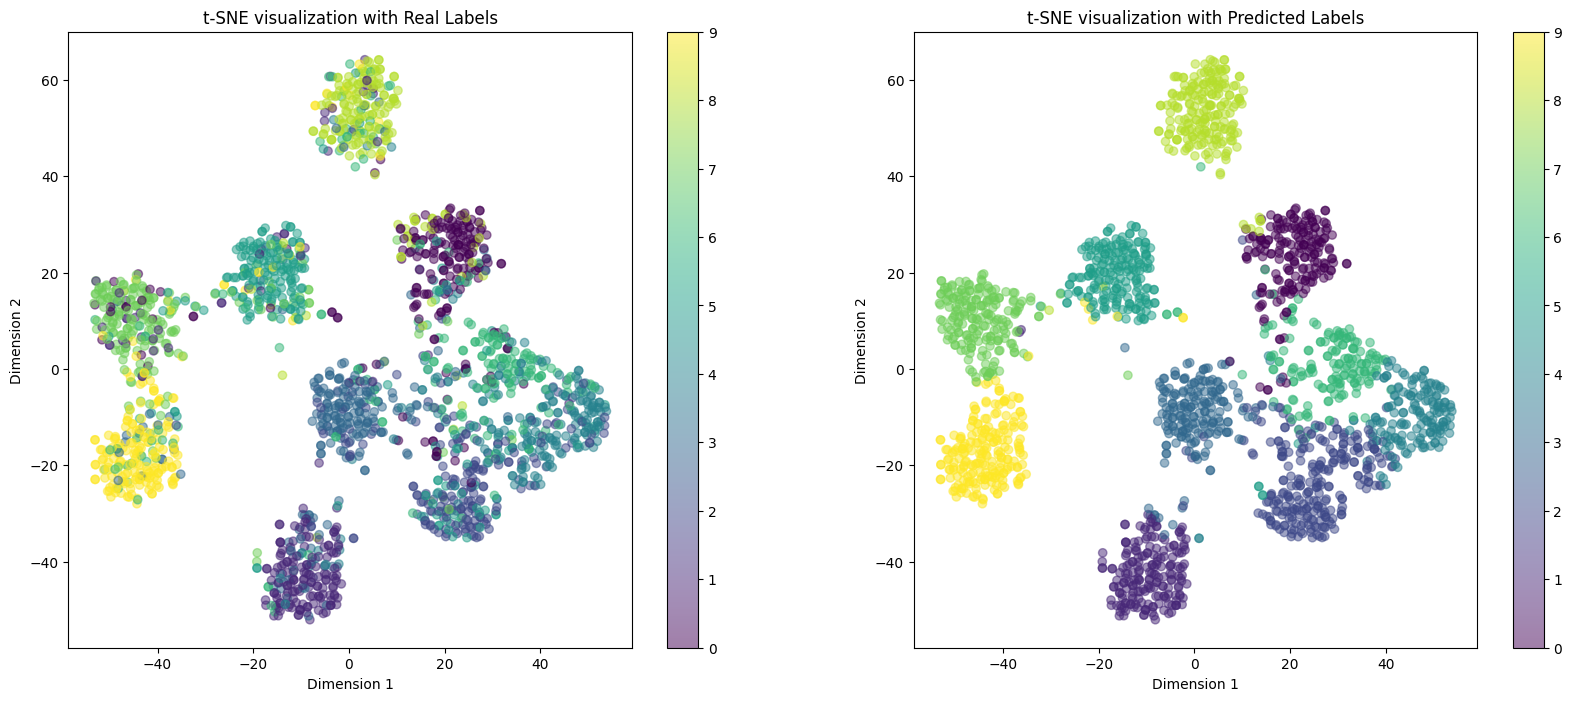

value counts for predicted:
[[  0 198]
 [  1 199]
 [  2 259]
 [  3 191]
 [  4 165]
 [  5 202]
 [  6 163]
 [  7 197]
 [  8 209]
 [  9 217]]
value counts for real:
[[  0 204]
 [  1 203]
 [  2 198]
 [  3 203]
 [  4 218]
 [  5 211]
 [  6 208]
 [  7 186]
 [  8 180]
 [  9 189]]


Testing: 100%|██████████| 125/125 [00:01<00:00, 72.22it/s]


Test Accuracy: 67.30%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 73.47it/s]


Test Accuracy: 70.20%
Test Precision: 0.71
Test Recall: 0.70
Test F1 Score: 0.70
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_2.pth
Finished training fold 2
Training fold 3/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 72.55it/s]


Test Accuracy: 67.30%
Test Precision: 0.68
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_3.pth
Finished training fold 3
Training fold 4/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 74.22it/s]


Test Accuracy: 67.85%
Test Precision: 0.68
Test Recall: 0.68
Test F1 Score: 0.67
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_4.pth
Finished training fold 4
Training fold 5/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 72.27it/s]


Test Accuracy: 68.00%
Test Precision: 0.68
Test Recall: 0.68
Test F1 Score: 0.68
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_5.pth
Finished training fold 5


Evaluating Noisy Samples for fold 5: 100%|██████████| 25/25 [00:54<00:00,  2.18s/it]


Predicted noise indices: [7443, 17713, 54456, 58603, 25346, 59781, 34689, 6509, 714, 35810, 25955, 46025, 30452, 34572, 28485, 55196, 34788, 57127, 55744, 2855, 49534, 30919, 6221, 13751, 29751, 10112, 54813, 51441, 9006, 55034, 53193, 40675, 3155, 46011, 54284, 55948, 41391, 30545, 33640, 17247, 44785, 29626, 9697, 14877, 11216, 44649, 36351, 48804, 51423, 6433, 38141, 6121, 40536, 50889, 12787, 8427, 14380, 43058, 16612, 58405, 50204, 6979, 38814, 11393, 37555, 3036, 19925, 33786, 24208, 21397, 25694, 28390, 33199, 51501, 42132, 46672, 46995, 7660, 24085, 29855, 52490, 10103, 33647, 766, 57866, 18430, 44355, 3485, 36362, 38748, 9347, 10942, 48489, 10190, 48169, 14856, 33638, 33646, 46457, 43677, 19965, 7398, 51785, 26782, 57148, 24787, 130, 28184, 5199, 41417, 59816, 22198, 16499, 39499, 21510, 46214, 17622, 24742, 31108, 42857, 54104, 45750, 56070, 56042, 45517, 4400, 21735, 41331, 34483, 1659, 15017, 39233, 3862, 21515, 35563, 9790, 15485, 41721, 20768, 34859, 47152, 31306, 1665, 9

Extracting Embeddings: 100%|██████████| 125/125 [00:01<00:00, 69.56it/s]


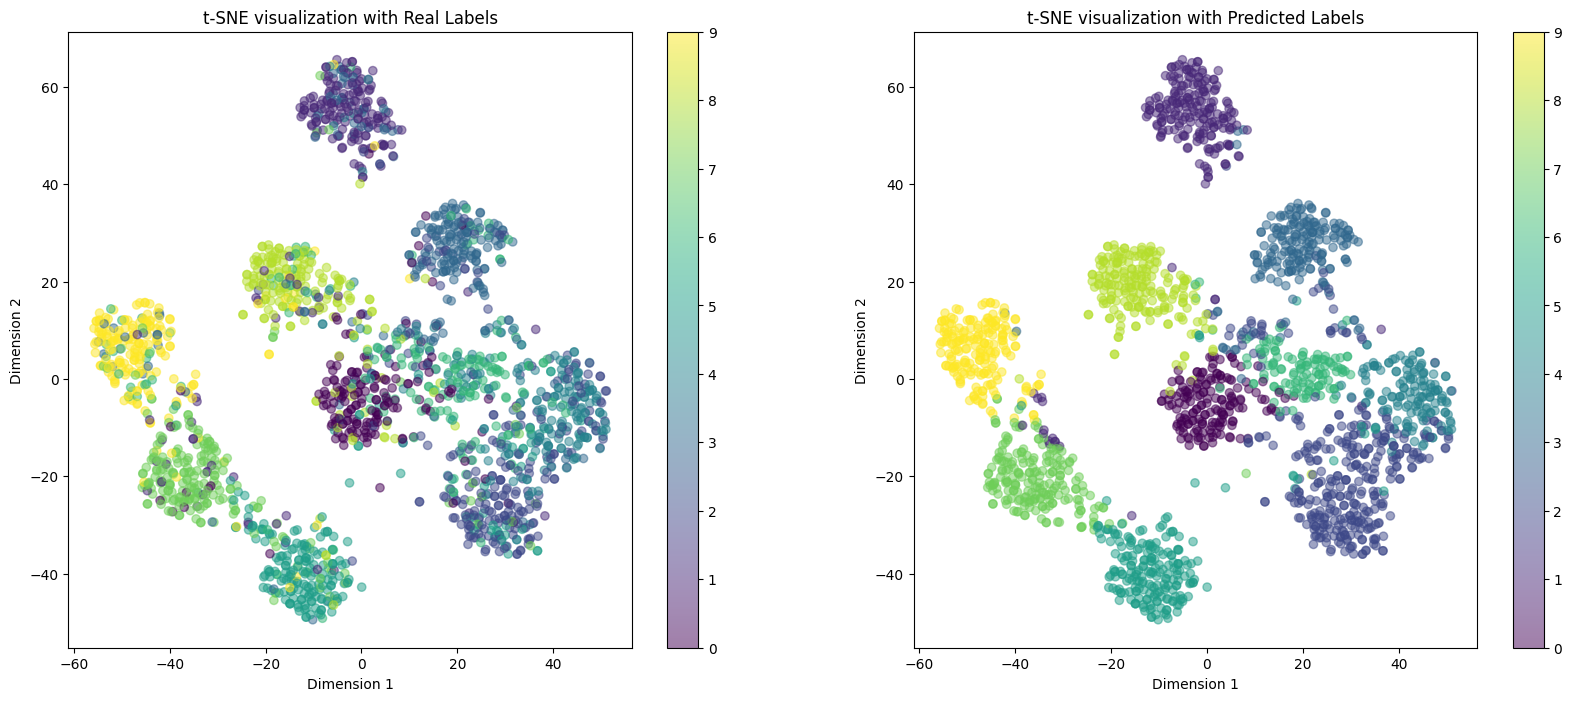

value counts for predicted:
[[  0 167]
 [  1 215]
 [  2 348]
 [  3 197]
 [  4 146]
 [  5 213]
 [  6 119]
 [  7 201]
 [  8 205]
 [  9 189]]
value counts for real:
[[  0 168]
 [  1 189]
 [  2 247]
 [  3 229]
 [  4 209]
 [  5 214]
 [  6 182]
 [  7 212]
 [  8 174]
 [  9 176]]


Testing: 100%|██████████| 125/125 [00:01<00:00, 73.11it/s]


Test Accuracy: 66.90%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.66
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 71.91it/s]


Test Accuracy: 69.15%
Test Precision: 0.69
Test Recall: 0.69
Test F1 Score: 0.69
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_2.pth
Finished training fold 2
Training fold 3/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 69.96it/s]


Test Accuracy: 67.75%
Test Precision: 0.68
Test Recall: 0.68
Test F1 Score: 0.68
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_3.pth
Finished training fold 3
Training fold 4/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 72.81it/s]


Test Accuracy: 68.25%
Test Precision: 0.69
Test Recall: 0.68
Test F1 Score: 0.68
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_4.pth
Finished training fold 4
Training fold 5/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 71.67it/s]


Test Accuracy: 66.95%
Test Precision: 0.68
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_5.pth
Finished training fold 5


Evaluating Noisy Samples for fold 5: 100%|██████████| 25/25 [00:48<00:00,  1.94s/it]


Predicted noise indices: [21954, 45625, 7251, 43438, 49421, 4242, 48237, 35000, 32284, 49968, 28464, 34204, 59046, 58343, 24956, 56855, 10523, 5676, 25188, 18689, 1877, 51616, 20503, 23596, 22155, 47748, 41982, 32342, 34421, 21803, 26685, 9817, 11555, 37241, 36045, 8519, 5521, 13540, 39104, 45599, 17354, 46477, 38857, 34810, 25908, 1722, 8008, 25753, 45130, 27802, 34112, 27487, 19872, 30257, 28867, 1730, 14230, 10134, 37904, 43992, 22195, 43221, 5877, 45643, 51727, 2884, 7565, 34200, 31882, 56659, 8837, 19737, 35107, 19479, 41858, 3252, 29861, 12938, 55576, 54575, 52047, 58128, 50950, 59767, 9628, 15189, 28333, 43573, 653, 47786, 30905, 48664, 11262, 6333, 8069, 28237, 55569, 57553, 22049, 26603, 33643, 21154, 6058, 29759, 52310, 26812, 55122, 23755, 59510, 32303, 35242, 51443, 3037, 39185, 57440, 5890, 55589, 23023, 12767, 30693, 5553, 10680, 26827, 41598, 26713, 58265, 1286, 16062, 49781, 42145, 7916, 40211, 57589, 25952, 40549, 19777, 7558, 40510, 54845, 49654, 32959, 32160, 51906, 

Extracting Embeddings: 100%|██████████| 125/125 [00:01<00:00, 66.45it/s]


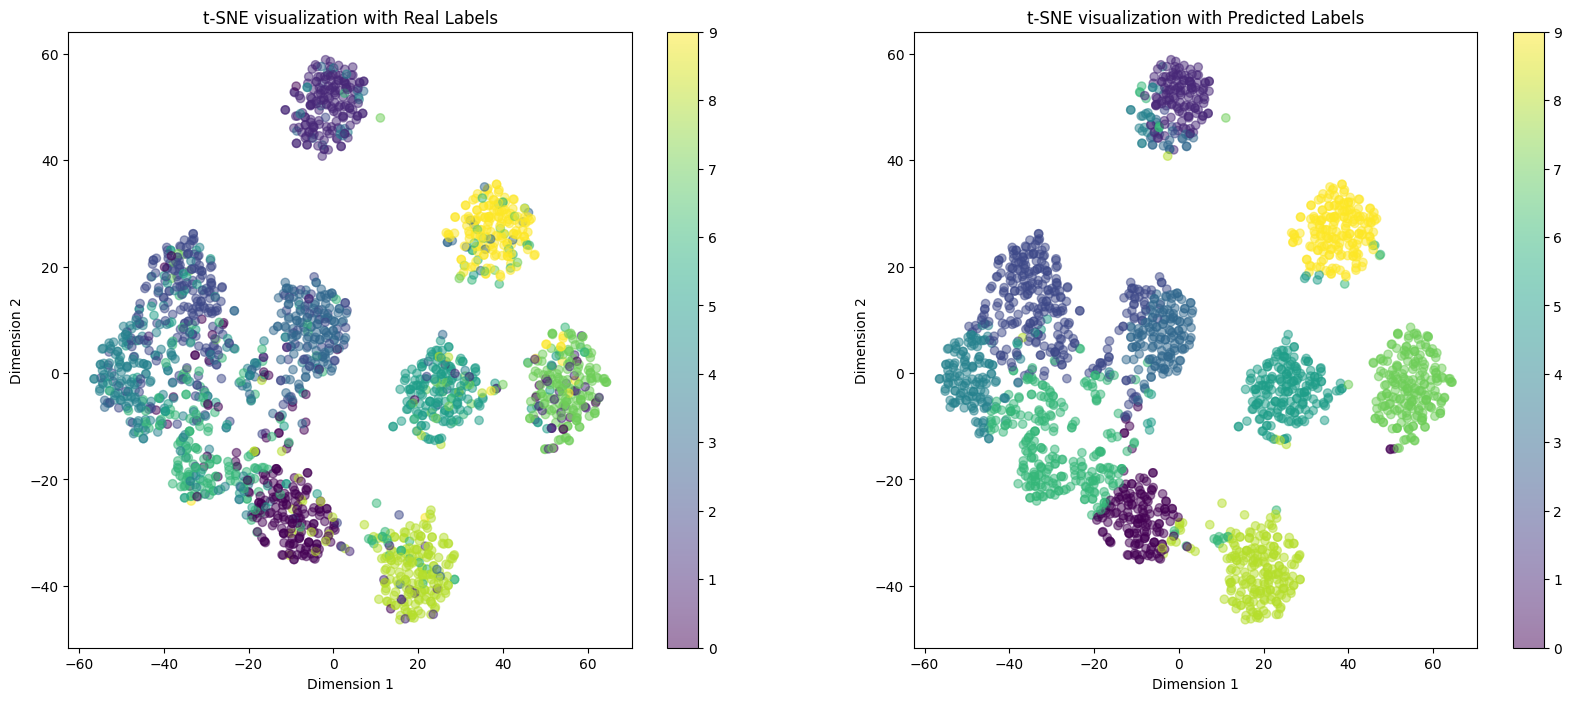

value counts for predicted:
[[  0 156]
 [  1 131]
 [  2 302]
 [  3 165]
 [  4 157]
 [  5 203]
 [  6 279]
 [  7 209]
 [  8 214]
 [  9 184]]
value counts for real:
[[  0 206]
 [  1 208]
 [  2 246]
 [  3 184]
 [  4 198]
 [  5 212]
 [  6 201]
 [  7 184]
 [  8 197]
 [  9 164]]


Testing: 100%|██████████| 125/125 [00:01<00:00, 75.00it/s]


Test Accuracy: 68.75%
Test Precision: 0.71
Test Recall: 0.69
Test F1 Score: 0.69
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 75.24it/s]


Test Accuracy: 68.40%
Test Precision: 0.69
Test Recall: 0.68
Test F1 Score: 0.68
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_2.pth
Finished training fold 2
Training fold 3/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 76.47it/s]


Test Accuracy: 68.85%
Test Precision: 0.69
Test Recall: 0.69
Test F1 Score: 0.69
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_3.pth
Finished training fold 3
Training fold 4/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 74.53it/s]


Test Accuracy: 66.85%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.66
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_4.pth
Finished training fold 4
Training fold 5/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 75.35it/s]


Test Accuracy: 69.00%
Test Precision: 0.69
Test Recall: 0.69
Test F1 Score: 0.69
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_5.pth
Finished training fold 5


Evaluating Noisy Samples for fold 5: 100%|██████████| 25/25 [00:52<00:00,  2.11s/it]


Predicted noise indices: [42669, 52927, 16669, 55147, 2633, 59605, 40014, 42019, 45767, 49138, 9679, 41534, 19864, 10513, 19620, 44215, 14142, 40020, 10871, 6933, 11060, 26227, 28830, 15162, 27655, 41657, 46747, 50847, 16136, 38713, 38238, 55603, 42369, 50059, 12521, 9376, 58821, 44621, 13942, 10607, 17643, 55940, 33127, 17099, 18267, 21469, 30612, 48351, 1248, 55985, 53783, 14326, 7726, 26955, 46736, 4455, 9259, 42346, 9154, 24454, 51486, 23940, 41296, 49127, 24474, 53961, 47482, 9680, 54478, 26327, 10966, 30839, 1733, 22185, 19236, 44267, 43592, 15294, 11400, 51041, 10088, 47431, 13871, 50560, 32367, 29726, 31461, 36282, 25736, 34756, 25701, 58586, 40558, 45483, 10362, 1265, 12113, 2653, 16059, 5451, 50839, 48203, 5528, 48607, 58807, 35056, 25754, 45026, 51697, 38430, 26608, 16645, 688, 23733, 2271, 7778, 40454, 40355, 26568, 9923, 58792, 14938, 40277, 7344, 15459, 16094, 33000, 14767, 33216, 31183, 36116, 39562, 19379, 11832, 35188, 12352, 34164, 26957, 4815, 51992, 51257, 20154, 46

Extracting Embeddings: 100%|██████████| 125/125 [00:01<00:00, 65.48it/s]


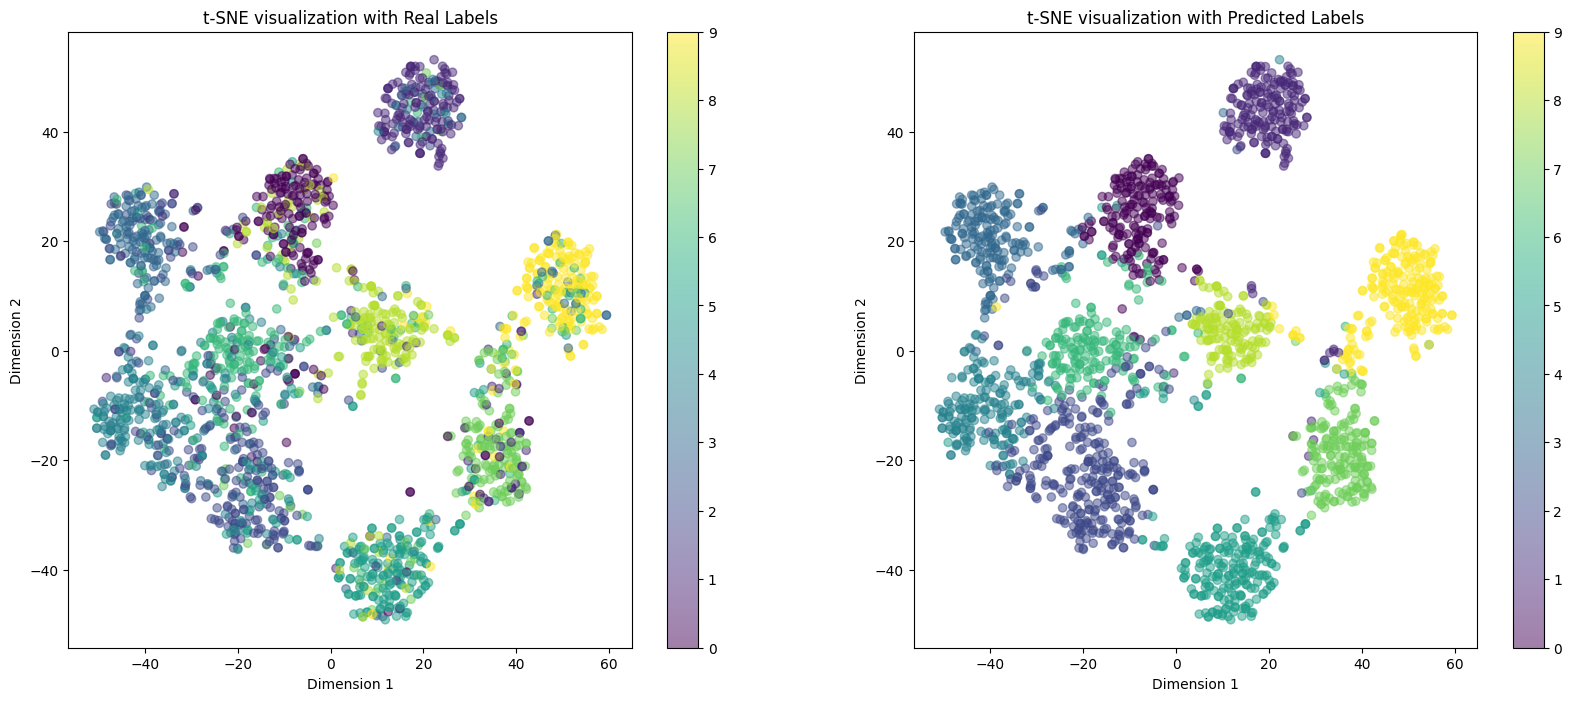

value counts for predicted:
[[  0 189]
 [  1 186]
 [  2 315]
 [  3 197]
 [  4 181]
 [  5 236]
 [  6 162]
 [  7 179]
 [  8 134]
 [  9 221]]
value counts for real:
[[  0 184]
 [  1 190]
 [  2 246]
 [  3 193]
 [  4 213]
 [  5 231]
 [  6 220]
 [  7 172]
 [  8 176]
 [  9 175]]


Testing: 100%|██████████| 125/125 [00:01<00:00, 71.43it/s]


Test Accuracy: 65.15%
Test Precision: 0.66
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 78.76it/s]


Test Accuracy: 66.95%
Test Precision: 0.68
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_2.pth
Finished training fold 2
Training fold 3/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 79.20it/s]


Test Accuracy: 66.70%
Test Precision: 0.68
Test Recall: 0.67
Test F1 Score: 0.66
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_3.pth
Finished training fold 3
Training fold 4/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 70.86it/s]


Test Accuracy: 66.60%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.66
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_4.pth
Finished training fold 4
Training fold 5/5...


Testing: 100%|██████████| 125/125 [00:01<00:00, 77.40it/s]


Test Accuracy: 67.15%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_5.pth
Finished training fold 5


Evaluating Noisy Samples for fold 5: 100%|██████████| 25/25 [00:51<00:00,  2.05s/it]


Predicted noise indices: [8075, 56194, 10408, 55681, 30774, 49336, 12668, 56059, 2342, 33565, 49726, 55275, 31638, 4626, 14935, 36374, 30090, 16284, 1621, 34055, 24053, 38276, 25214, 16864, 58433, 5138, 40252, 13809, 5162, 6638, 57221, 51651, 57223, 198, 55825, 32775, 13603, 4354, 53727, 3829, 4878, 15801, 44697, 37083, 52048, 46923, 8064, 55156, 22727, 52046, 30849, 56670, 55071, 22005, 15626, 11328, 48331, 42538, 14382, 2784, 55106, 57844, 40435, 46324, 46337, 2346, 42152, 5539, 5628, 29871, 24840, 14776, 22401, 7762, 36811, 46108, 2843, 49387, 10011, 54958, 3498, 2530, 45722, 46236, 24791, 19680, 21945, 39823, 14881, 42565, 47137, 28288, 57050, 1109, 10295, 36926, 25772, 51157, 38516, 39634, 38176, 47722, 56890, 48326, 20996, 7212, 34902, 34433, 549, 43369, 43326, 24815, 46858, 56816, 1535, 44735, 15324, 51409, 41671, 46263, 51531, 5556, 49319, 44326, 54344, 18761, 49125, 40882, 32305, 39437, 4716, 14545, 17617, 15184, 17957, 12212, 48816, 42950, 28111, 35076, 28667, 16201, 56148, 1

In [3]:
noise_cleaner.clean()

In [16]:
import models.predictor
import importlib
importlib.reload(models.predictor)
from models.predictor import Predictor

In [17]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400)

In [22]:
predictor.train(10)

Training Epoch 1/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 93.46%
Epoch 1/10, Loss: 0.24129432162879844


Training Epoch 2/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 96.31%
Epoch 2/10, Loss: 0.12274887458940523


Training Epoch 3/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 97.07%
Epoch 3/10, Loss: 0.08064110191390578


Training Epoch 4/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.81%
Epoch 4/10, Loss: 0.07340764353233101


Training Epoch 5/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.51%
Epoch 5/10, Loss: 0.059963096196936294


Training Epoch 6/10: 100%|██████████| 113/113 [01:38<00:00,  1.15it/s]


Validation Accuracy: 97.89%
Epoch 6/10, Loss: 0.0528966288980657


Training Epoch 7/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.85%
Epoch 7/10, Loss: 0.03885995962582858


Training Epoch 8/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.95%
Epoch 8/10, Loss: 0.03452066272760915


Training Epoch 9/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 98.30%
Epoch 9/10, Loss: 0.030963845262551203


Training Epoch 10/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 98.22%
Epoch 10/10, Loss: 0.02610123477282777


In [23]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

Test Accuracy: 90.21%


0.9021

## CIFAR 10

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=False)
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet18/model_resnet18_cifar10_fold_{}.pth", folds_num=6, model='resnet18', train_noise_level=0.2, epochs_num=50, train_pairs=6000, val_pairs=1000)

Seed: 86
noise count: 10298 out of 50000 data


In [ ]:
noise_cleaner.clean()